In [2]:
import xarray as xr
import cartopy.feature as cfeature
import cartopy.crs as ccrs
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
import rioxarray
from shapely.geometry import Polygon
import pandas as pd

In [3]:
ds = xr.open_dataset('cru_ts4.07.1901.2022.pre.dat.nc')
ds

<xarray.Dataset> Size: 5GB
Dimensions:  (lon: 720, lat: 360, time: 1464)
Coordinates:
  * lon      (lon) float32 3kB -179.8 -179.2 -178.8 -178.2 ... 178.8 179.2 179.8
  * lat      (lat) float32 1kB -89.75 -89.25 -88.75 -88.25 ... 88.75 89.25 89.75
  * time     (time) datetime64[ns] 12kB 1901-01-16 1901-02-15 ... 2022-12-16
Data variables:
    pre      (time, lat, lon) float32 2GB ...
    stn      (time, lat, lon) float64 3GB ...
Attributes:
    Conventions:  CF-1.4
    title:        CRU TS4.07 Precipitation
    institution:  Data held at British Atmospheric Data Centre, RAL, UK.
    source:       Run ID = 2304141047. Data generated from:pre.2304141039.dtb
    history:      Fri 14 Apr 12:49:03 BST 2023 : User f098 : Program makegrid...
    references:   Information on the data is available at http://badc.nerc.ac...
    comment:      Access to these data is available to any registered CEDA user.
    contact:      support@ceda.ac.uk

In [4]:
prep_SA = ds.sel(time=slice('1990','2020'),lon=slice(16.45,32.90),lat=slice(-34.85,-22.13))
prep_SA

<xarray.Dataset> Size: 4MB
Dimensions:  (lon: 33, lat: 26, time: 372)
Coordinates:
  * lon      (lon) float32 132B 16.75 17.25 17.75 18.25 ... 31.75 32.25 32.75
  * lat      (lat) float32 104B -34.75 -34.25 -33.75 ... -23.25 -22.75 -22.25
  * time     (time) datetime64[ns] 3kB 1990-01-16 1990-02-15 ... 2020-12-16
Data variables:
    pre      (time, lat, lon) float32 1MB ...
    stn      (time, lat, lon) float64 3MB ...
Attributes:
    Conventions:  CF-1.4
    title:        CRU TS4.07 Precipitation
    institution:  Data held at British Atmospheric Data Centre, RAL, UK.
    source:       Run ID = 2304141047. Data generated from:pre.2304141039.dtb
    history:      Fri 14 Apr 12:49:03 BST 2023 : User f098 : Program makegrid...
    references:   Information on the data is available at http://badc.nerc.ac...
    comment:      Access to these data is available to any registered CEDA user.
    contact:      support@ceda.ac.uk

In [5]:
SA_shp = gpd.read_file("d:\PRPJECT\cru_ts4.07.1901.2022.pre.dat.nc\gadm41_ZAF_1.json\gadm41_ZAF_1.json")
p = SA_shp.crs
print(p)

<>:1: SyntaxWarning: invalid escape sequence '\P'
<>:1: SyntaxWarning: invalid escape sequence '\P'
C:\Users\NanaYaw\AppData\Local\Temp\ipykernel_16012\1166364602.py:1: SyntaxWarning: invalid escape sequence '\P'
  SA_shp = gpd.read_file("d:\PRPJECT\cru_ts4.07.1901.2022.pre.dat.nc\gadm41_ZAF_1.json\gadm41_ZAF_1.json")


EPSG:4326


<>:2: SyntaxWarning: invalid escape sequence '\P'
<>:2: SyntaxWarning: invalid escape sequence '\P'
C:\Users\NanaYaw\AppData\Local\Temp\ipykernel_16012\3916863399.py:2: SyntaxWarning: invalid escape sequence '\P'
  SA_shp = gpd.read_file('d:\PRPJECT\cru_ts4.07.1901.2022.pre.dat.nc\gadm41_ZAF_1.json\gadm41_ZAF_1.json')  # Note: Use forward slashes


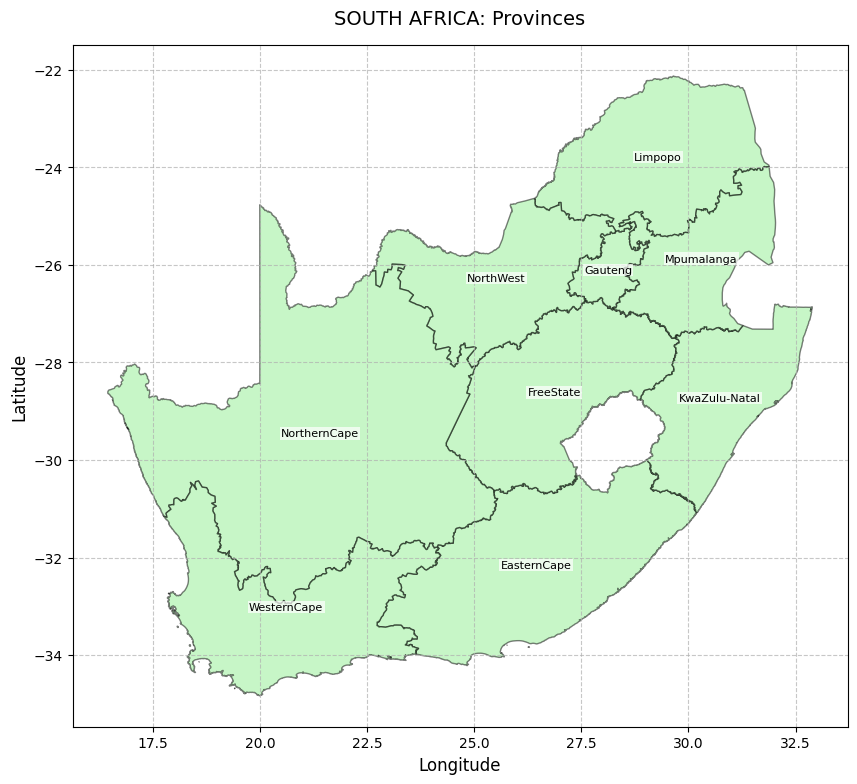

In [ ]:


# Load South Africa shapefile (JSON format 'd:\PRPJECT\cru_ts4.07.1901.2022.pre.dat.nc\gadm41_ZAF_1.json\gadm41_ZAF_1.json'from GADM)
SA_shp = gpd.read_file()  # Note: Use forward slashes

# Ensure CRS is WGS84 (EPSG:4326)
if SA_shp.crs != "EPSG:4326":
    SA_shp = SA_shp.to_crs(epsg=4326)

# Create plot
fig, ax = plt.subplots(figsize=(10, 10))

# Plot South African provinces
SA_shp.plot(
    ax=ax,
    edgecolor='black',
    facecolor='lightgreen',
    alpha=0.5
)

# Add province labels
for idx, row in SA_shp.iterrows():
    centroid = row.geometry.centroid  
    province_name = row['NAME_1']  # Column name for provinces in GADM
    
    ax.annotate(
        text=province_name,
        xy=(centroid.x, centroid.y),
        xytext=(0, 0),
        textcoords="offset points",
        ha='center',
        va='center',
        fontsize=8,
        color='black',
        bbox=dict(
            facecolor='white',
            alpha=0.7,
            edgecolor='none',
            pad=1
        )
    )

# Customize plot
plt.title("SOUTH AFRICA: Provinces", fontsize=14, pad=15)
ax.set_xlabel("Longitude", fontsize=12)
ax.set_ylabel("Latitude", fontsize=12)
ax.grid(True, linestyle='--', alpha=0.7)

# Save and display
plt.savefig('SOUTH_AFRICA_PROVINCES.png', dpi=600, bbox_inches='tight')
plt.show()

In [7]:
SA = prep_SA.mean(dim='time')
SA


<xarray.Dataset> Size: 11kB
Dimensions:  (lon: 33, lat: 26)
Coordinates:
  * lon      (lon) float32 132B 16.75 17.25 17.75 18.25 ... 31.75 32.25 32.75
  * lat      (lat) float32 104B -34.75 -34.25 -33.75 ... -23.25 -22.75 -22.25
Data variables:
    pre      (lat, lon) float32 3kB nan nan nan nan ... 34.37 35.87 35.92 37.88
    stn      (lat, lon) float64 7kB nan nan nan nan ... 7.005 7.468 7.468 7.204

In [8]:
filled_data = SA.fillna(0)
filled_data

<xarray.Dataset> Size: 11kB
Dimensions:  (lat: 26, lon: 33)
Coordinates:
  * lon      (lon) float32 132B 16.75 17.25 17.75 18.25 ... 31.75 32.25 32.75
  * lat      (lat) float32 104B -34.75 -34.25 -33.75 ... -23.25 -22.75 -22.25
Data variables:
    pre      (lat, lon) float32 3kB 0.0 0.0 0.0 0.0 ... 34.37 35.87 35.92 37.88
    stn      (lat, lon) float64 7kB 0.0 0.0 0.0 0.0 ... 7.005 7.468 7.468 7.204

<>:2: SyntaxWarning: invalid escape sequence '\P'
<>:2: SyntaxWarning: invalid escape sequence '\P'
C:\Users\NanaYaw\AppData\Local\Temp\ipykernel_16012\3308939788.py:2: SyntaxWarning: invalid escape sequence '\P'
  shapefile_path = "d:\PRPJECT\cru_ts4.07.1901.2022.pre.dat.nc\gadm41_ZAF_1.json\gadm41_ZAF_1.json"


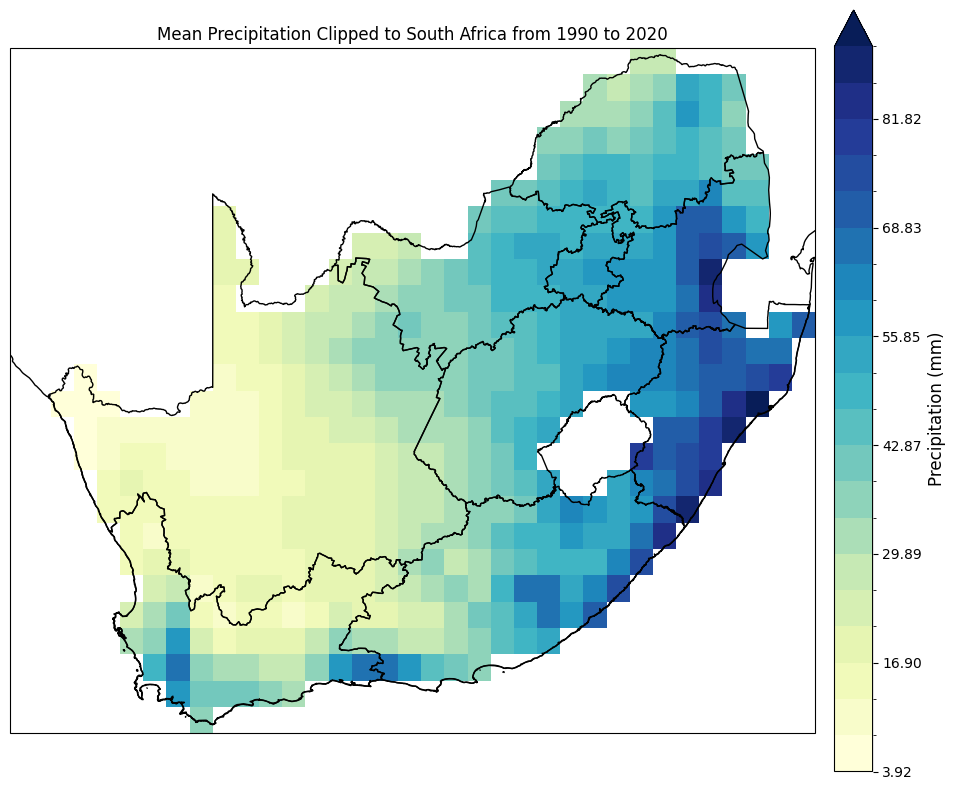

In [9]:


# Load your shapefile
shapefile_path = "d:\PRPJECT\cru_ts4.07.1901.2022.pre.dat.nc\gadm41_ZAF_1.json\gadm41_ZAF_1.json"
shape_gdf = gpd.read_file(shapefile_path)

# Ensure it's in WGS84 (EPSG:4326)
shape_gdf = shape_gdf.to_crs("EPSG:4326")

# Convert the DataArray to use spatial referencing
pre_data = filled_data['pre']
pre_data.rio.set_spatial_dims(x_dim="lon", y_dim="lat", inplace=True)
pre_data.rio.write_crs("EPSG:4326", inplace=True)

# Mask using shapefile
masked = pre_data.rio.clip(shape_gdf.geometry, shape_gdf.crs, drop=False, invert=False)


# Plotting
fig, ax = plt.subplots(figsize=(10, 8), subplot_kw={'projection': ccrs.PlateCarree()})
# Set appropriate levels
vmin = float(masked.min())
vmax = float(masked.max())
levels = np.linspace(vmin, vmax, 21)


# Plot clipped data
im = masked.plot.pcolormesh(
    ax=ax,
    cmap='YlGnBu',
    levels=levels,
    extend='max',
    add_colorbar=False
)

# Add shapefile outline
shape_gdf.boundary.plot(ax=ax, edgecolor='black', linewidth=1)

# Add base features
ax.coastlines(resolution='10m')
cbar=plt.colorbar(im, ax=ax, orientation='vertical', pad=0.02)
cbar.set_label('Precipitation (mm)', fontsize=12)
plt.title("Mean Precipitation Clipped to South Africa from 1990 to 2020")
plt.tight_layout()
plt.show()


ANNUAL MEAN PRECIPITATION TIME SERIES

In [10]:
#Monthly totals
m_t = prep_SA.resample(time='1M').sum('time')
m_t


C:\Users\NanaYaw\AppData\Roaming\Python\Python313\site-packages\xarray\groupers.py:487: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  self.index_grouper = pd.Grouper(


<xarray.Dataset> Size: 4MB
Dimensions:  (time: 372, lat: 26, lon: 33)
Coordinates:
  * lon      (lon) float32 132B 16.75 17.25 17.75 18.25 ... 31.75 32.25 32.75
  * lat      (lat) float32 104B -34.75 -34.25 -33.75 ... -23.25 -22.75 -22.25
  * time     (time) datetime64[ns] 3kB 1990-01-31 1990-02-28 ... 2020-12-31
Data variables:
    pre      (time, lat, lon) float32 1MB 0.0 0.0 0.0 0.0 ... 102.5 104.0 108.1
    stn      (time, lat, lon) float64 3MB 0.0 0.0 0.0 0.0 ... 1.0 1.0 1.0 1.0
Attributes:
    Conventions:  CF-1.4
    title:        CRU TS4.07 Precipitation
    institution:  Data held at British Atmospheric Data Centre, RAL, UK.
    source:       Run ID = 2304141047. Data generated from:pre.2304141039.dtb
    history:      Fri 14 Apr 12:49:03 BST 2023 : User f098 : Program makegrid...
    references:   Information on the data is available at http://badc.nerc.ac...
    comment:      Access to these data is available to any registered CEDA user.
    contact:      support@ceda.ac.uk

In [11]:
#Annual Mean
A_T=prep_SA.resample(time='1Y').sum('time')
annual_m=A_T.groupby('time.year').mean(dim='time')
annual_m

C:\Users\NanaYaw\AppData\Roaming\Python\Python313\site-packages\xarray\groupers.py:487: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  self.index_grouper = pd.Grouper(


<xarray.Dataset> Size: 320kB
Dimensions:  (year: 31, lat: 26, lon: 33)
Coordinates:
  * lon      (lon) float32 132B 16.75 17.25 17.75 18.25 ... 31.75 32.25 32.75
  * lat      (lat) float32 104B -34.75 -34.25 -33.75 ... -23.25 -22.75 -22.25
  * year     (year) int64 248B 1990 1991 1992 1993 1994 ... 2017 2018 2019 2020
Data variables:
    pre      (year, lat, lon) float32 106kB 0.0 0.0 0.0 ... 441.1 439.6 440.1
    stn      (year, lat, lon) float64 213kB 0.0 0.0 0.0 0.0 ... 89.0 89.0 89.0
Attributes:
    Conventions:  CF-1.4
    title:        CRU TS4.07 Precipitation
    institution:  Data held at British Atmospheric Data Centre, RAL, UK.
    source:       Run ID = 2304141047. Data generated from:pre.2304141039.dtb
    history:      Fri 14 Apr 12:49:03 BST 2023 : User f098 : Program makegrid...
    references:   Information on the data is available at http://badc.nerc.ac...
    comment:      Access to these data is available to any registered CEDA user.
    contact:      support@ceda.ac.uk

TIME SERIES


In [12]:
year=['1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011','2012','2013','2014','2015','2016','2017','2018','2019','2020']
month=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sept','Oct','Nov','Dec']

In [ ]:
annual_pre = annual_m['pre'].mean(dim=['lat', 'lon'])
annual_pre

<xarray.DataArray 'pre' (year: 31)> Size: 124B
array([310.4699 , 409.95825, 245.66573, 360.08893, 310.0845 , 384.12143,
       445.619  , 405.36386, 392.07635, 360.2232 , 500.85526, 430.94476,
       340.8105 , 314.26202, 380.2367 , 331.31366, 459.16318, 346.87424,
       357.95898, 379.17062, 380.88498, 436.15793, 377.0957 , 343.7261 ,
       368.49582, 308.18372, 350.0057 , 357.77505, 321.9062 , 320.18893,
       370.15814], dtype=float32)
Coordinates:
  * year     (year) int64 248B 1990 1991 1992 1993 1994 ... 2017 2018 2019 2020

Standard Deviation of Annual Precipitation: 51.24 mm


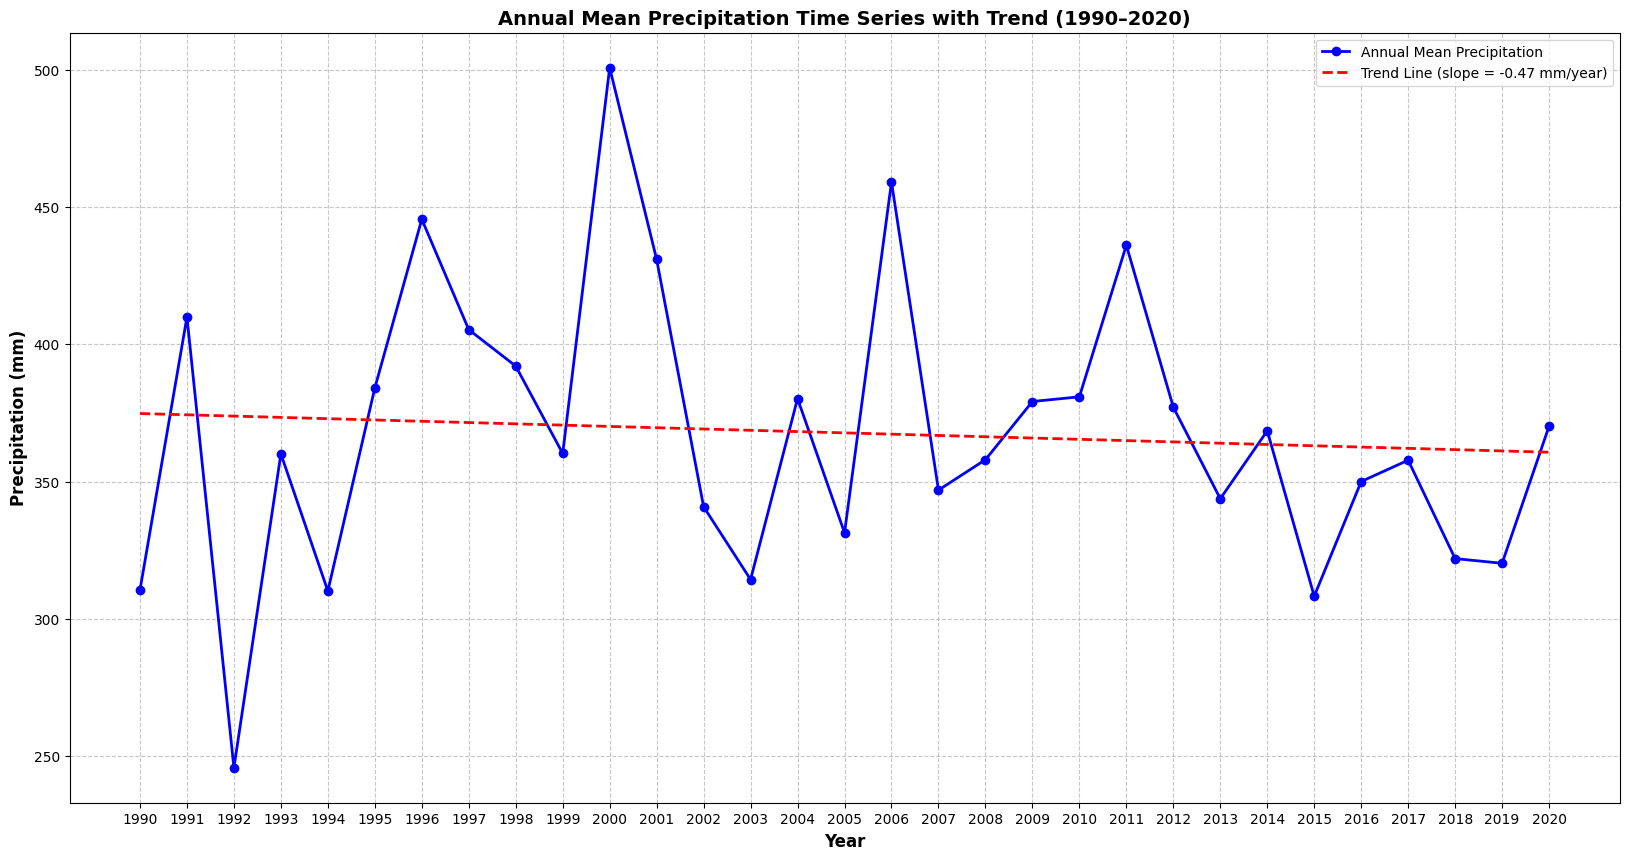

Precipitation is decreasing by 0.47 mm/year.


In [48]:

# Getting year and precipitation values
years = annual_pre['year'].values
precip = annual_pre.values

#  Fiting a linear trend line
slope, intercept = np.polyfit(years, precip, 1)
trend_line = slope * years + intercept

#  Calculating standard deviation (variability)
std_dev = np.std(precip)
print(f"Standard Deviation of Annual Precipitation: {std_dev:.2f} mm")

#  Plotting time series and trend line
fig, ax = plt.subplots(figsize=(20, 10))
ax.plot(years, precip, color='blue', marker='o', linewidth=2, label='Annual Mean Precipitation')
ax.plot(years, trend_line, color='red', linestyle='--', linewidth=2,
        label=f'Trend Line (slope = {slope:.2f} mm/year)')

ax.set_xlabel('Year', fontsize=12, fontweight='bold')
ax.set_ylabel('Precipitation (mm)', fontsize=12, fontweight='bold')
ax.set_title('Annual Mean Precipitation Time Series with Trend (1990–2020)', fontsize=14, fontweight='bold')
ax.set_xticks(years)
ax.grid(True, linestyle='--', alpha=0.7)
ax.legend()
fig.savefig('annual_precipitation_trend_1990_2020.png', bbox_inches='tight', dpi=500, facecolor='white')
plt.show()

# Interpreting trend
if slope > 0:
    print(f"Precipitation is increasing by {slope:.2f} mm/year.")
elif slope < 0:
    print(f"Precipitation is decreasing by {abs(slope):.2f} mm/year.")
else:
    print("No clear trend in precipitation.")


In [17]:
year=['1990,1991,1992,1993,1994,1995,1996,1997,1998,1999']

DECADAL AVERAGES


In [ ]:

# Select and average for the two decades 
first_decade = ds.sel(time=slice('1990-01-01', '1999-12-31'))
recent_decade = ds.sel(time=slice('2010-01-01', '2020-12-31'))

# Computing annual mean for each year (spatial mean first) 
first_annual = first_decade['pre'].mean(dim=['lat', 'lon']).groupby('time.year').mean()
recent_annual = recent_decade['pre'].mean(dim=['lat', 'lon']).groupby('time.year').mean()

 #Preparing data for plotting
years_1990s = first_annual['year'].values
precip_1990s = first_annual.values

years_2010s = recent_annual['year'].values
precip_2010s = recent_annual.values
slope_1990s, intercept_1990s = np.polyfit(years_1990s, precip_1990s, 1)
trend_1990s = slope_1990s * years_1990s + intercept_1990s

slope_2010s, intercept_2010s = np.polyfit(years_2010s, precip_2010s, 1)
trend_2010s = slope_2010s * years_2010s + intercept_2010s

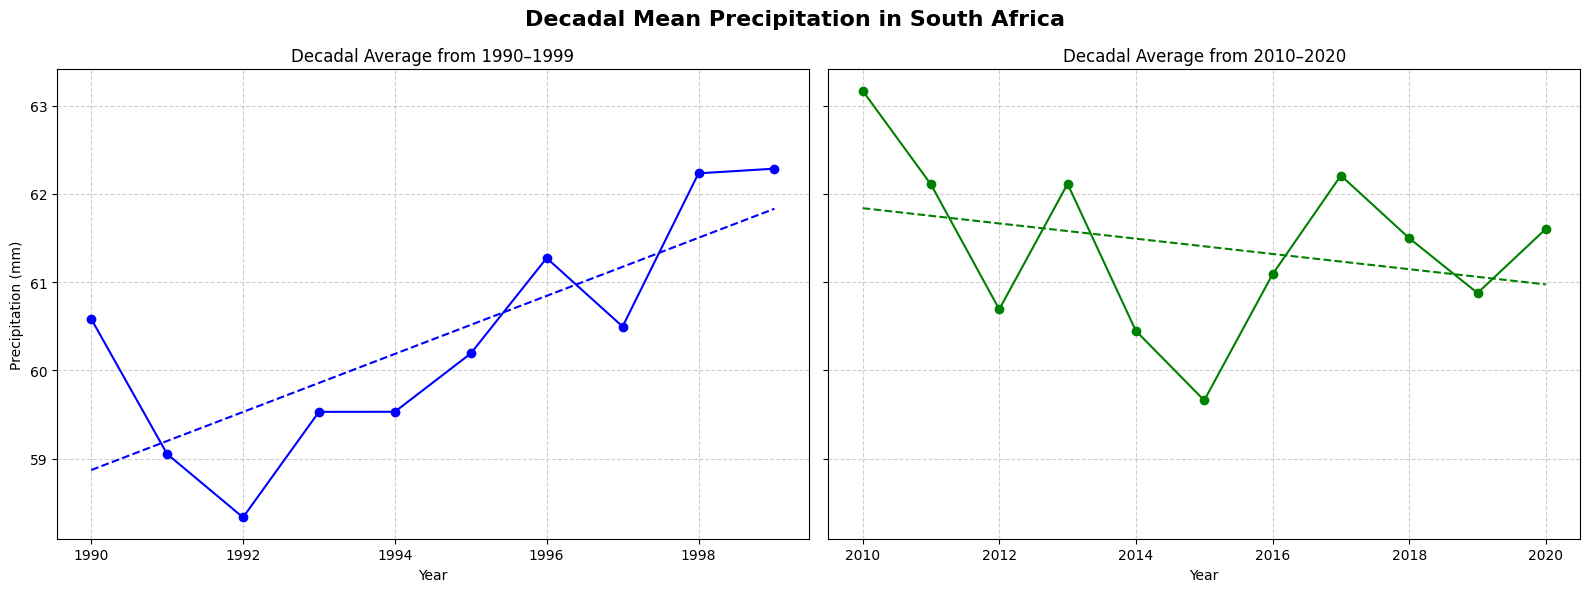

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

# Plot for 1990s
ax1.plot(years_1990s, precip_1990s, marker='o', color='blue')
ax1.plot(years_1990s, trend_1990s, linestyle='--', color='blue', label=f'Trend ({slope_1990s:.2f} mm/yr)')
ax1.set_title('Decadal Average from 1990–1999')
ax1.set_xlabel('Year')
ax1.set_ylabel('Precipitation (mm)')
ax1.grid(True, linestyle='--', alpha=0.6)

# Plot for 2010s
ax2.plot(years_2010s, precip_2010s, marker='o', color='green')
ax2.plot(years_2010s, trend_2010s, linestyle='--', color='green', label=f'Trend ({slope_2010s:.2f} mm/yr)')
ax2.set_title('Decadal Average from 2010–2020')
ax2.set_xlabel('Year')
ax2.grid(True, linestyle='--', alpha=0.6)
fig.suptitle('Decadal Mean Precipitation in South Africa', fontsize=16, fontweight='bold')
plt.tight_layout()
fig.savefig('separated_periods_precipitation.png', bbox_inches='tight', dpi=500)
plt.show()


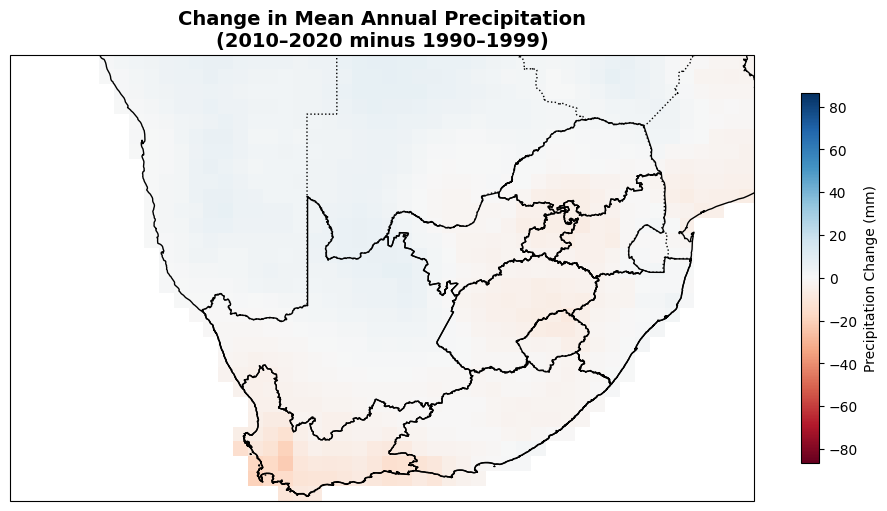

In [ ]:

# Compute decadal mean precipitation at each grid point
first_decade_mean = first_decade['pre'].groupby('time.year').mean(dim='time').mean(dim='year')
recent_decade_mean = recent_decade['pre'].groupby('time.year').mean(dim='time').mean(dim='year')

#  Computing spatial difference 
diff = recent_decade_mean - first_decade_mean  

#  Load shapefile 
shapefile_path = r"d:\PRPJECT\cru_ts4.07.1901.2022.pre.dat.nc\gadm41_ZAF_1.json\gadm41_ZAF_1.json"
shape_gdf = gpd.read_file(shapefile_path)
shape_gdf = shape_gdf.to_crs("EPSG:4326")  

# Plotting 
fig = plt.figure(figsize=(12, 8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([10, 35, -35, -20], crs=ccrs.PlateCarree())  # Focus on South Africa

# Ploting the difference
diff_plot = ax.pcolormesh(ds['lon'], ds['lat'], diff,cmap='RdBu', shading='auto',vmin=-abs(diff).max(), vmax=abs(diff).max())

# Adding shapefile overlay
for geometry in shape_gdf.geometry:
    ax.add_geometries([geometry], crs=ccrs.PlateCarree(), edgecolor='black', facecolor='none', linewidth=1)
ax.coastlines()
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.set_title('Change in Mean Annual Precipitation\n(2010–2020 minus 1990–1999)', fontsize=14, fontweight='bold')
cb = plt.colorbar(diff_plot, ax=ax, orientation='vertical', shrink=0.6, label='Precipitation Change (mm)')

plt.savefig('precip_difference_map_with_boundary.png', dpi=500, bbox_inches='tight')
plt.show()


In [ ]:

# Select the two decades
first_decade = ds.sel(time=slice('1990-01-01', '1999-12-31'))
recent_decade = ds.sel(time=slice('2010-01-01', '2020-12-31'))

# Compute annual mean for each year (spatial mean first)
first_annual = first_decade['pre'].mean(dim=['lat', 'lon']).groupby('time.year').mean()
recent_annual = recent_decade['pre'].mean(dim=['lat', 'lon']).groupby('time.year').mean()

# Calculate the annual mean for each grid point for both decades
first_annual_grid = first_decade['pre'].mean(dim='time')
recent_annual_grid = recent_decade['pre'].mean(dim='time')

# Calculate the difference between the two decades for each grid point
precip_diff = recent_annual_grid - first_annual_grid

# Flatten the grid data for processing
latitudes = ds['lat'].values
longitudes = ds['lon'].values

# Store the results in a DataFrame for sorting
results = []

for lat in latitudes:
    for lon in longitudes:
        # Calculate precipitation difference at each grid point
        diff = precip_diff.sel(lat=lat, lon=lon).values
        magnitude_change = diff  # The difference is the magnitude of change
        results.append([lat, lon, magnitude_change])

# Create a DataFrame for easy sorting and reporting
df_results = pd.DataFrame(results, columns=['Latitude', 'Longitude', 'Magnitude of Change (mm/year)'])

# Sort the results by the magnitude of change
df_sorted = df_results.sort_values(by='Magnitude of Change (mm/year)', ascending=False)

# Get the top 5 grid points with the largest increase and decrease in precipitation
top_5_increase = df_sorted.head(5)
top_5_decrease = df_sorted.tail(5)

# Print the tables
print("Top 5 Grid Points with the Largest Increase in Precipitation:")
print(top_5_increase)

print("\nTop 5 Grid Points with the Largest Decrease in Precipitation:")
print(top_5_decrease)


Top 5 Grid Points with the Largest Increase in Precipitation:
        Latitude  Longitude Magnitude of Change (mm/year)
0         -89.75    -179.75                           nan
174170     30.75     145.25                           nan
172651     29.75     105.75                     13.243942
172650     29.75     105.25                     13.087891
172649     29.75     104.75                     12.138428

Top 5 Grid Points with the Largest Decrease in Precipitation:
        Latitude  Longitude Magnitude of Change (mm/year)
86403     -29.75    -178.25                           nan
86402     -29.75    -178.75                           nan
86294     -30.25     127.25                    -1.8524952
86293     -30.25     126.75                    -1.9365845
259199     89.75     179.75                           nan


<>:15: SyntaxWarning: invalid escape sequence '\P'
<>:15: SyntaxWarning: invalid escape sequence '\P'
C:\Users\NanaYaw\AppData\Local\Temp\ipykernel_16012\904999889.py:15: SyntaxWarning: invalid escape sequence '\P'
  sa_shape = gpd.read_file("d:\PRPJECT\cru_ts4.07.1901.2022.pre.dat.nc\gadm41_ZAF_1.json\gadm41_ZAF_1.json")
C:\Users\NanaYaw\AppData\Roaming\Python\Python313\site-packages\numpy\lib\_nanfunctions_impl.py:1620: RuntimeWarning: All-NaN slice encountered
  return fnb._ureduce(a,


C:\Users\NanaYaw\AppData\Roaming\Python\Python313\site-packages\xarray\core\duck_array_ops.py:234: RuntimeWarning: invalid value encountered in cast
  return data.astype(dtype, **kwargs)
C:\Users\NanaYaw\AppData\Roaming\Python\Python313\site-packages\xarray\plot\utils.py:260: RuntimeWarning: overflow encountered in scalar absolute
  vlim = max(abs(vmin - center), abs(vmax - center))


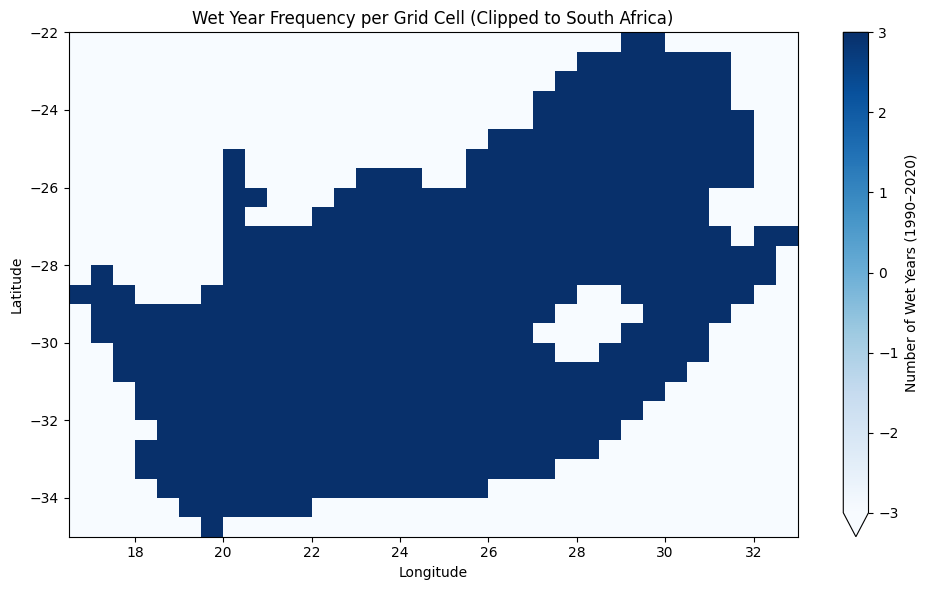

In [ ]:

# Step 4: Compute 90th percentile per grid cell
p90 = annual_m.quantile(0.9, dim='time')

# Step 5: Identify wet years
wet_years = annual_m > p90

# Step 6: Count wet years
wet_year_freq = wet_years.sum(dim='time')

# Step 7: Set CRS (Coordinate Reference System) if missing
wet_year_freq.rio.set_spatial_dims(x_dim="lon", y_dim="lat", inplace=True)
wet_year_freq.rio.write_crs("EPSG:4326", inplace=True)  # Assuming WGS84

# Step 8: Load South Africa shapefile
sa_shape = gpd.read_file("d:\PRPJECT\cru_ts4.07.1901.2022.pre.dat.nc\gadm41_ZAF_1.json\gadm41_ZAF_1.json")

# Step 9: Clip data to South Africa's borders
wet_year_freq_clipped = wet_year_freq.rio.clip(sa_shape.geometry, sa_shape.crs, drop=True)

# Step 10: Plot
plt.figure(figsize=(10, 6))
wet_year_freq_clipped.plot(
    cmap='Blues',
    cbar_kwargs={'label': 'Number of Wet Years (1990–2020)'}
)
plt.title('Wet Year Frequency per Grid Cell (Clipped to South Africa)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.tight_layout()
plt.show()
